In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("energy_consumption_dataset.csv", parse_dates=['Timestamp'])


In [2]:
df['Hour'] = df['Timestamp'].dt.hour
df['DayOfWeek'] = df['Timestamp'].dt.day_name()
df['Date'] = df['Timestamp'].dt.date


In [3]:
# By department
agg_dept = df.groupby('Department')['Energy_Consumed_kWh'].sum().reset_index()

# By equipment type
agg_equip = df.groupby('Equipment_Type')['Energy_Consumed_kWh'].sum().reset_index()


In [4]:
shift_day_usage = df.groupby(['Shift', 'DayOfWeek'])['Energy_Consumed_kWh'].mean().reset_index()


In [5]:
hourly_usage = df.groupby('Hour')['Energy_Consumed_kWh'].mean().reset_index()


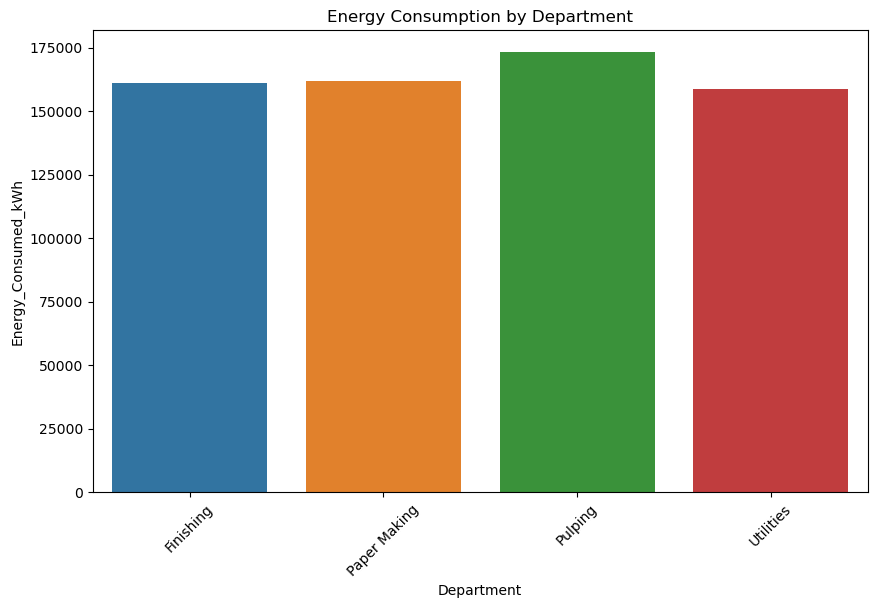

C:\Users\91855\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\91855\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


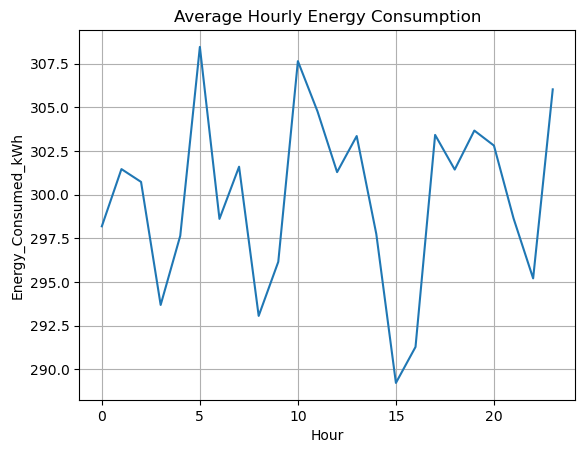

In [6]:
plt.figure(figsize=(10,6))
sns.barplot(data=agg_dept, x='Department', y='Energy_Consumed_kWh')
plt.title("Energy Consumption by Department")
plt.xticks(rotation=45)
plt.show()

sns.lineplot(data=hourly_usage, x='Hour', y='Energy_Consumed_kWh')
plt.title("Average Hourly Energy Consumption")
plt.grid(True)
plt.show()


In [7]:
industry_benchmark = 250  # kWh
df['Above_Benchmark'] = df['Energy_Consumed_kWh'] > industry_benchmark
violations = df[df['Above_Benchmark']].groupby('Department')['Energy_Consumed_kWh'].count()


In [8]:
summary_by_day = df.groupby('DayOfWeek')['Energy_Consumed_kWh'].sum().sort_values(ascending=False)
summary_by_shift = df.groupby('Shift')['Energy_Consumed_kWh'].mean()


In [10]:
recommendations = [
    "- Optimize usage during non-peak hours.",
    "- Perform maintenance on high-consumption equipment.",
    "- Monitor departments exceeding benchmark regularly.",
    "- Balance energy load across shifts."
]

for rec in recommendations:
    print("*", rec)


* - Optimize usage during non-peak hours.
* - Perform maintenance on high-consumption equipment.
* - Monitor departments exceeding benchmark regularly.
* - Balance energy load across shifts.
